In [ ]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv("epa_air_quality_annual_summary.csv")


In [ ]:
# Select relevant columns for VAR modeling
# For example, you can select columns related to pollution levels
relevant_columns = ['arithmetic_mean', 'arithmetic_standard_dev', 'first_max_value', 'second_max_value', 'third_max_value']

# Drop rows with missing values
df = df[relevant_columns].dropna()

# Convert data types if necessary
# For example, convert datetime columns to datetime objects
# df['first_max_datetime'] = pd.to_datetime(df['first_max_datetime'])


In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Initialize and fit the VAR model
model = VAR(df)
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
results

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 12, Apr, 2024
Time:                     08:25:04
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    43.0414
Nobs:                     2109.00    HQIC:                   42.9904
Log likelihood:          -60235.1    FPE:                4.54698e+18
AIC:                      42.9610    Det(Omega_mle):     4.48285e+18
--------------------------------------------------------------------
Results for equation arithmetic_mean
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             53.955858        10.448462            5.164           0.000
L1.arithmetic_mean                 0.031830         0.143620            0.222           0.82

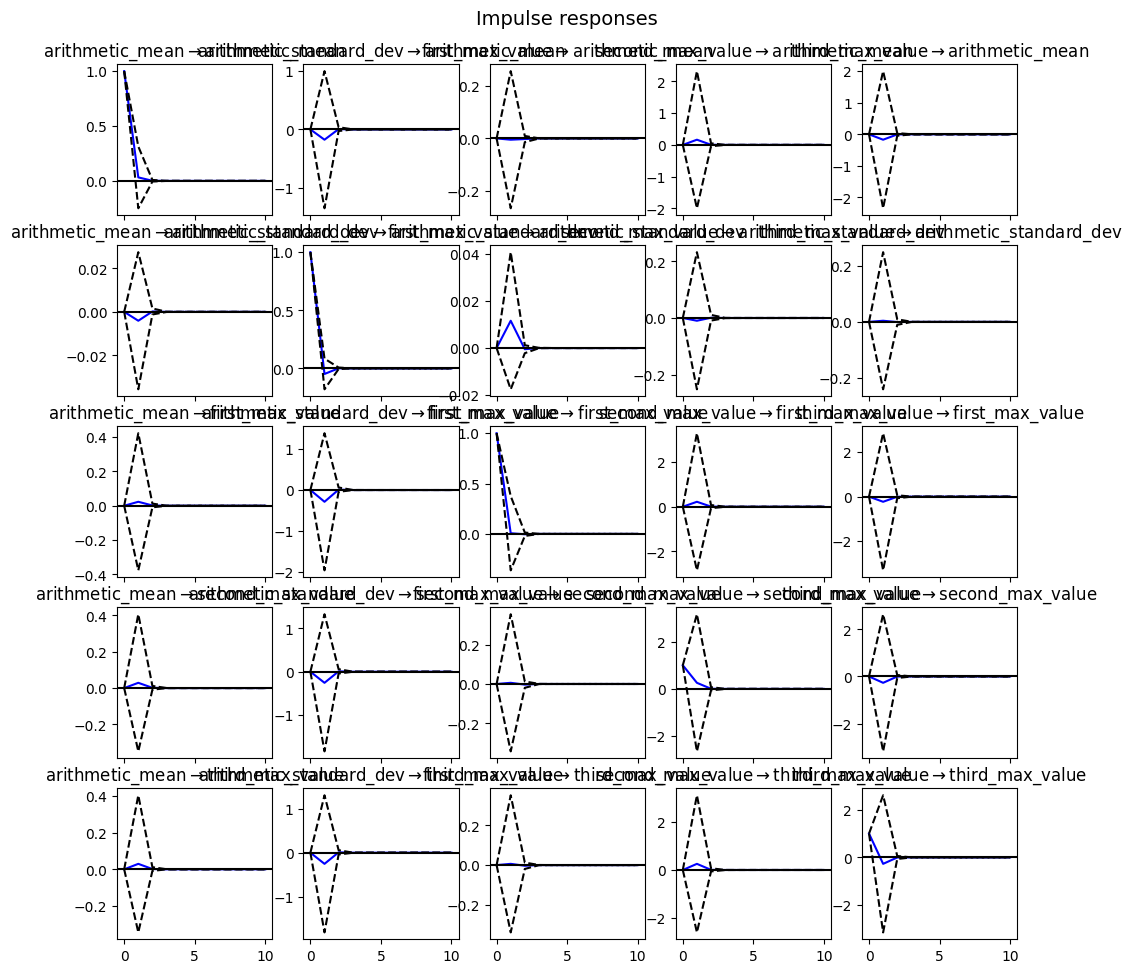

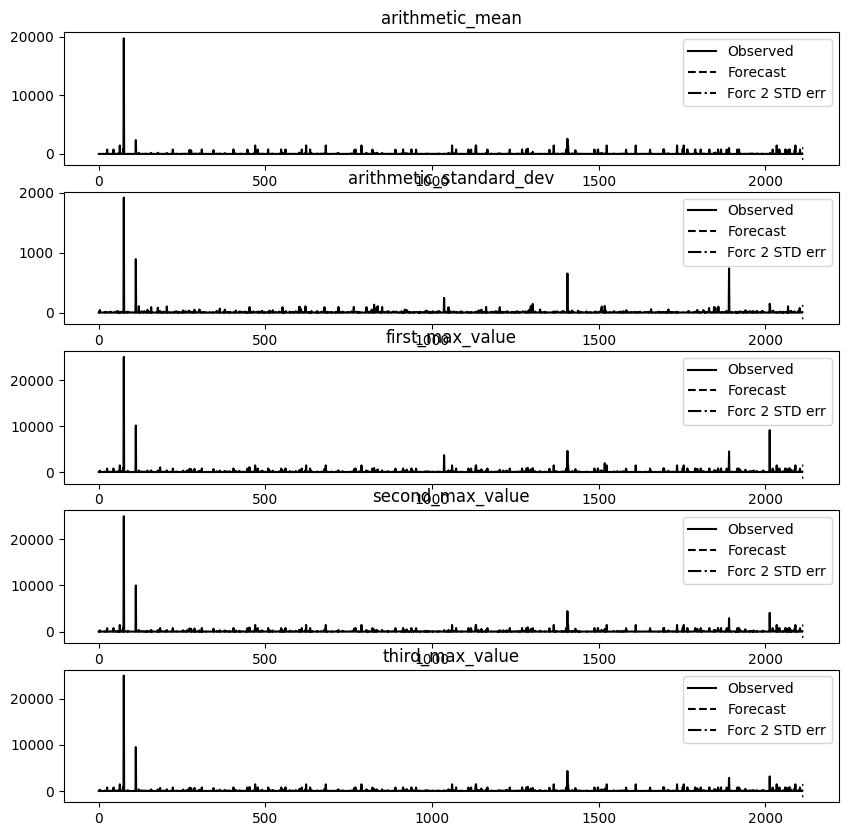

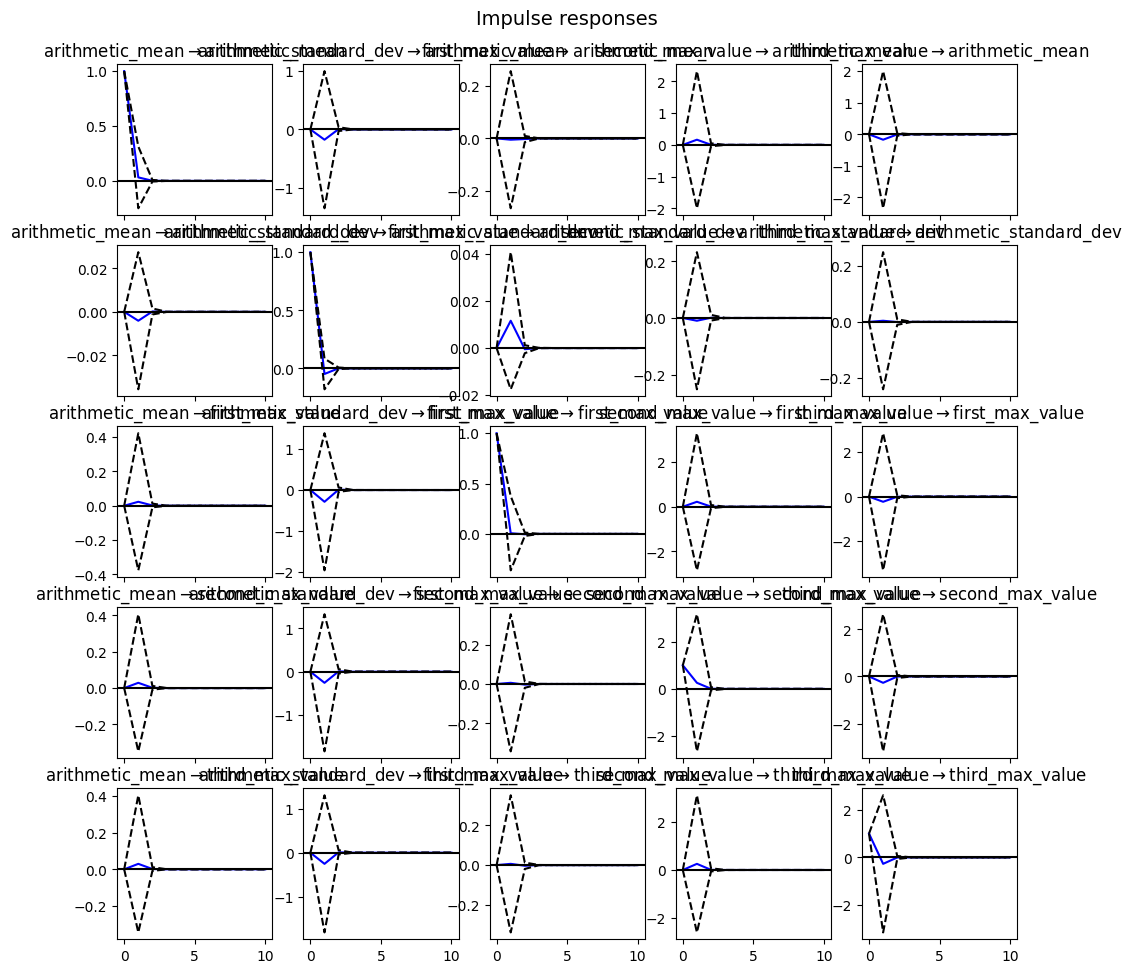

In [ ]:
# Summary of the VAR model
print(results.summary())

# Get the lag order
print("Lag Order:", results.k_ar)

# Check for serial correlation of residuals using Durbin-Watson statistic
print("Durbin-Watson statistic:", results.resid_acorr())

# Forecasting
forecast = results.forecast(df.values, steps=5)  # Adjust the number of steps as needed
print("Forecasted values for the next 5 steps:")
print(forecast)

# Plotting forecasted values
results.plot_forecast(5)  # Adjust the number of steps as needed

# Granger Causality Tests
granger_test = results.test_causality('arithmetic_mean', 'first_max_value', kind='f')  # Adjust variables as needed
print(granger_test.summary())

# Impulse Response Functions
irf = results.irf(periods=10)  # Adjust the number of periods as needed
irf.plot(orth=False)  # Plot impulse response functions
